## tensor practice

In [ ]:
import torch as tr
import torch.nn as nn

X = tr.tensor([[1],[2],[3],[4]], dtype=tr.float32)
Y = tr.tensor([[2],[4],[6],[8]], dtype=tr.float32)

t = tr.tensor([5],dtype=tr.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()

        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)


print(f'pre-training: f(5) = {model(t).item():.3f}')

lr = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = tr.optim.SGD(model.parameters(), lr)

for epoch in range(n_iters):
    y_pred = model(X)

    l = loss(Y, y_pred)

    l.backward()

    optimizer.step()

    optimizer.zero_grad()

    if epoch % 10 == 0:
       [w, b] = model.parameters()
       print(f'epoch {epoch+1}: w = {w[0][0].item():.03f}, loss = {l:.08f}')

print(f'post-training: f(5) = {model(t).item():.3f}')

# regressions

## linear regression and representation

epoch: 100, loss: 559.7307


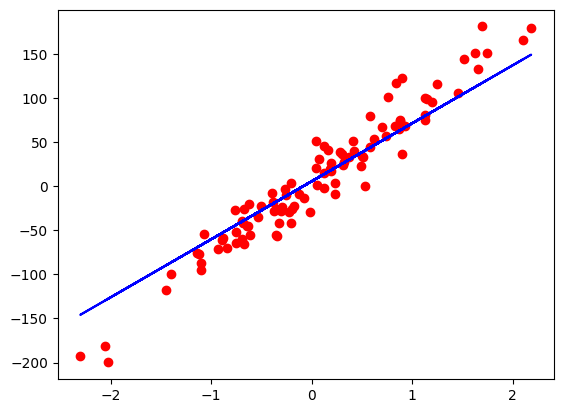

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)


learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 100

for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()




## logistic regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()


X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#scale
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self,x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

model = LogisticRegression(n_features)
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#training
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / y_test.shape[0]
    print(f'accuracy: {acc:.4f}')




epoch: 10, loss: 0.6045
epoch: 20, loss: 0.5036
epoch: 30, loss: 0.4376
epoch: 40, loss: 0.3908
epoch: 50, loss: 0.3557
epoch: 60, loss: 0.3282
epoch: 70, loss: 0.3060
epoch: 80, loss: 0.2875
epoch: 90, loss: 0.2719
epoch: 100, loss: 0.2585
accuracy: 0.9211


# data

## dataset and data loading

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataSet(Dataset):
    def __init__(self):
        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]])
        self.n_samples = xy.shape[0]

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return self.n_samples

dataset = WineDataSet()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data
print(features, labels)

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        if (i + 1) % 5 == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, step {i + 1}/{n_iterations}, inputs {inputs.shape}')

tensor([[1.3280e+01, 1.6400e+00, 2.8400e+00, 1.5500e+01, 1.1000e+02, 2.6000e+00,
         2.6800e+00, 3.4000e-01, 1.3600e+00, 4.6000e+00, 1.0900e+00, 2.7800e+00,
         8.8000e+02],
        [1.2770e+01, 3.4300e+00, 1.9800e+00, 1.6000e+01, 8.0000e+01, 1.6300e+00,
         1.2500e+00, 4.3000e-01, 8.3000e-01, 3.4000e+00, 7.0000e-01, 2.1200e+00,
         3.7200e+02],
        [1.2290e+01, 1.6100e+00, 2.2100e+00, 2.0400e+01, 1.0300e+02, 1.1000e+00,
         1.0200e+00, 3.7000e-01, 1.4600e+00, 3.0500e+00, 9.0600e-01, 1.8200e+00,
         8.7000e+02],
        [1.2370e+01, 1.1700e+00, 1.9200e+00, 1.9600e+01, 7.8000e+01, 2.1100e+00,
         2.0000e+00, 2.7000e-01, 1.0400e+00, 4.6800e+00, 1.1200e+00, 3.4800e+00,
         5.1000e+02]]) tensor([[1.],
        [2.],
        [2.],
        [2.]])
178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])


## dataset transforms

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataSet(Dataset):
    def __init__(self, transform=None):
        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]])
        self.n_samples = xy.shape[0]

        self.transform = transform

    def __getitem__(self, index):
        sample =  self.x[index], self.y[index]
        if self.transform:
                    sample = self.transform(sample)
        return sample

    def __len__(self):
        return self.n_samples

class ToTensor():
    def __call__(self, sample):
        inputs, targets = sample
        return inputs, targets

dataset = WineDataSet(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))

# functions

## softmax and Crossentropy

In [ ]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)

def crossentropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss

Y = np.array([1,0,0])

Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1,0.3,0.6])
l1 = crossentropy(Y,Y_pred_good)
l2 = crossentropy(Y,Y_pred_bad)


## CE in torch

In [ ]:
import torch
import torch.nn as nn
import numpy as np

loss = nn.CrossEntropyLoss()
Y = torch.tensor([2, 0, 1])

Y_pred_good = torch.tensor([[0.1,1.0,2.1],[2.0,1.0,0.1],[0.1,3.0,0.1]])
Y_pred_bad = torch.tensor([[2.1,1.0,0.1],[0.1,1.0,2.1],[0.1,3.0,0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(predictions1, predictions2)

tensor([2, 0, 1]) tensor([0, 2, 1])


## activation function

In [ ]:
import torch
import torch.nn as nn

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
      super(NeuralNet, self).__init__()
      self.linear1 = nn.Linear(input_size, hidden_size)
      self.lrelu = nn.LeakyReLU()
      self.linear2 = nn.Linear(hidden_size, 1)
      self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    out = self.linear1(x)
    out = self.lrelu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out




## feed forward net

torch.Size([100, 1, 28, 28]) torch.Size([100])


KeyboardInterrupt: ignored

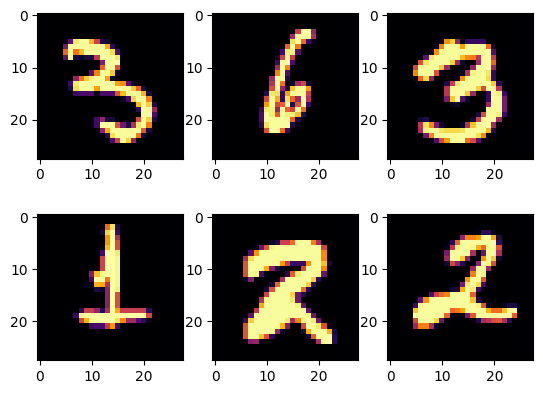

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size = 784 #28 x 28
hidden_size = 100 #can try diff
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = .001

#MNIST
train_dataset = torchvision.datasets.MNIST(root = './sample_data', train = True,
                                           transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './sample_data', train = False,
                                          transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                          shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='inferno')

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss {loss.item():.4f}')

# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    #returns val & index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100 * n_correct / n_samples
  print(f'accuracy = {acc}%')


#full models

## CNN

In [ ]:
from matplotlib.transforms import Transform
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 4
batch_size = 4
learning_rate = .001

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])



#MNIST
train_dataset = torchvision.datasets.CIFAR10(root='./sample_data', train=True,
                                           download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root ='./sample_data', train=False,
                                          download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return x



model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)
    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)
    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss {loss.item():.4f}')

print('finished training')
# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    #returns val & index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predictions == labels).sum().item()
    for i in range(batch_size):
      label = labels[i]
      pred = predictions[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1

  acc = 100 * n_correct / n_samples
  print(f'total accuracy = {acc}%')

  for i in range(10):
    acc = 100 * n_class_correct[i] / n_class_samples[i]
    print(f'accuracy of {classes[i]} = {acc}%')


##transfer learning

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'sample_data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(class_names)

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0

  for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(
         time_elapsed // 60, time_elapsed % 60))
  print('Best val Acc: {:4f}'.format(best_acc))

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model

model = models.resnet18(weights=True)
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

#scheduler
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=2)


#-----train2-----
model = models.resnet18(weights=True)
for param in model.parameters():
  param.requires_grad = False

num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

#scheduler
step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=2)



KeyboardInterrupt: ignored

# tensorboard (using feed forward net)

Epoch [1/1], Step [100/938], Loss: 0.1064
Epoch [1/1], Step [200/938], Loss: 0.2341
Epoch [1/1], Step [300/938], Loss: 0.1376
Epoch [1/1], Step [400/938], Loss: 0.1710
Epoch [1/1], Step [500/938], Loss: 0.1456
Epoch [1/1], Step [600/938], Loss: 0.2084
Epoch [1/1], Step [700/938], Loss: 0.0725
Epoch [1/1], Step [800/938], Loss: 0.1868
Epoch [1/1], Step [900/938], Loss: 0.4573
Accuracy of the network on the 10000 test images: 96.18 %


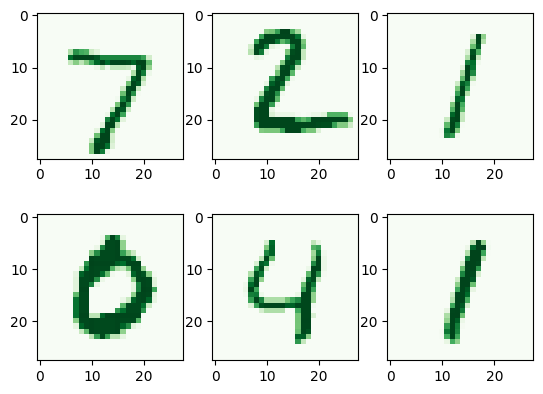

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# tensorboard
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('run/mnist')

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.01

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='Greens')
#plt.show()

# tensorboard
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# tensorboard
writer.add_graph(model, example_data.reshape(-1, 28*28).to(device))
#writer.close()
#sys.exit()

# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            # tensorboard
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0

# Test the model
# In test phase, don't compute gradients (memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(labels)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    classes = range(10)
    for i in classes:
      labels_i = class_labels == i
      preds_i = class_preds[:,i]
      writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
      writer.close()




In [ ]:
!kill 98437
#%tensorboard --logdir run

# save and load modules

In [ ]:
import torch
import torch.nn as nn
# save dict
PATH = name.pth #pth for pytorch
torch.save(model.state_dict(), PATH)
# remake model
model = Model(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
#optimizer also has state_dict()

checkpoint = {
    "epoch": 90,
    "model_state": model.state_dict(),
    "optim_state": optimizer.state_dict()
}

torch.save(checkpoint, "checkpoint.pth")

loaded_checkpoint = torch.load("checkpoint.pth")
epoch = loaded_checkpoint["epoch"]
#lines 7-9 but with checkpoint instead of torch.load
#do the same with the optimizer

'''
if on GPU, make the model then use model.to(device)
if going from CPU to GPU use model.load_state_dict(torch.load(PATH, map_location="cuda:0"))
'''
